<h1>Greedy Oracle</h1>


In [1]:
import os
from pterotactyl.reconstruction import touch 
from pterotactyl.reconstruction import vision 
from pterotactyl.policies.baselines import greedy
from pterotactyl import pretrained

TOUCH_LOCATION = os.path.dirname(pretrained.__file__) + '/reconstruction/touch/best/'
VISION_LOCATION = os.path.dirname(pretrained.__file__) + '/reconstruction/vision/t_p/'




class Params: # define training arguments 
    def __init__(self):
        
        self.limit_data = True
        self.env_batch_size = 2
        self.num_actions = 50
        self.seed = 0 
        self.budget = 5
        self.number_points = 10000
        self.loss_coeff = 9000
        self.exp_type = "greedy_example"
        self.finger = False 
        self.num_grasps = 5 
        self.use_touch = True 
        self.use_img = False
        self.touch_location = TOUCH_LOCATION
        self.vision_location = VISION_LOCATION
        self.visualize = True
        self.use_latent = False
        self.use_recon = True 
        self.eval = True 
        self.greedy_checks = 3
        self.pretrained_recon = True
        
    

params = Params()
greedy_test = greedy.Engine(params)
greedy_test()

pybullet build time: Sep 20 2021 20:33:29
/private/home/ejsmith/.conda/envs/cluster/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:529: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")
100%|█████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 4540.87it/s]


The number of test set objects found : 13
argv[0]=
argv[0]=


 17%|█████████████▊                                                                     | 1/6 [00:06<00:32,  6.43s/it]

Valid || score: 0.1049 reward = 0.8951 ave: 10.4934 %


 33%|███████████████████████████▋                                                       | 2/6 [00:11<00:22,  5.73s/it]

Valid || score: 0.0793 reward = 0.9207 ave: 9.2094 %


 50%|█████████████████████████████████████████▌                                         | 3/6 [00:16<00:16,  5.54s/it]

Valid || score: 0.1942 reward = 0.8058 ave: 12.6133 %


 67%|███████████████████████████████████████████████████████▎                           | 4/6 [00:22<00:10,  5.46s/it]

Valid || score: 0.2423 reward = 0.7577 ave: 15.5173 %


 83%|█████████████████████████████████████████████████████████████████████▏             | 5/6 [00:27<00:05,  5.44s/it]

Valid || score: 0.1587 reward = 0.8413 ave: 15.5886 %


 83%|█████████████████████████████████████████████████████████████████████▏             | 5/6 [00:33<00:05,  5.44s/it]

Valid || score: 0.1339 reward = 0.8661 ave: 15.2225 %
*******************************
rendering the predicted objects
*******************************


  0%|          | 0/12 [00:00<?, ?it/s]

argv[0]=
argv[0]=


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:36<00:00,  6.09s/it]

******************************
*********************************************
Total Valid || score: 0.1522, reward = 0.8478
*********************************************


We can now visualize the predicted objects with greedy actions, and also the distribution of chosen actions both in a histogram and projected from the shpere of posssible actions into image space. 

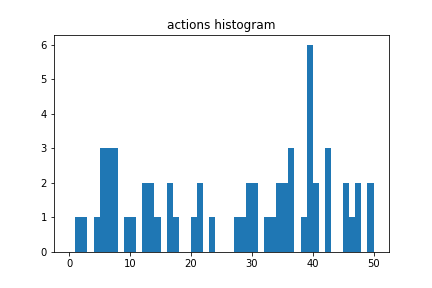




   Projected Actions


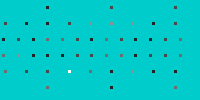

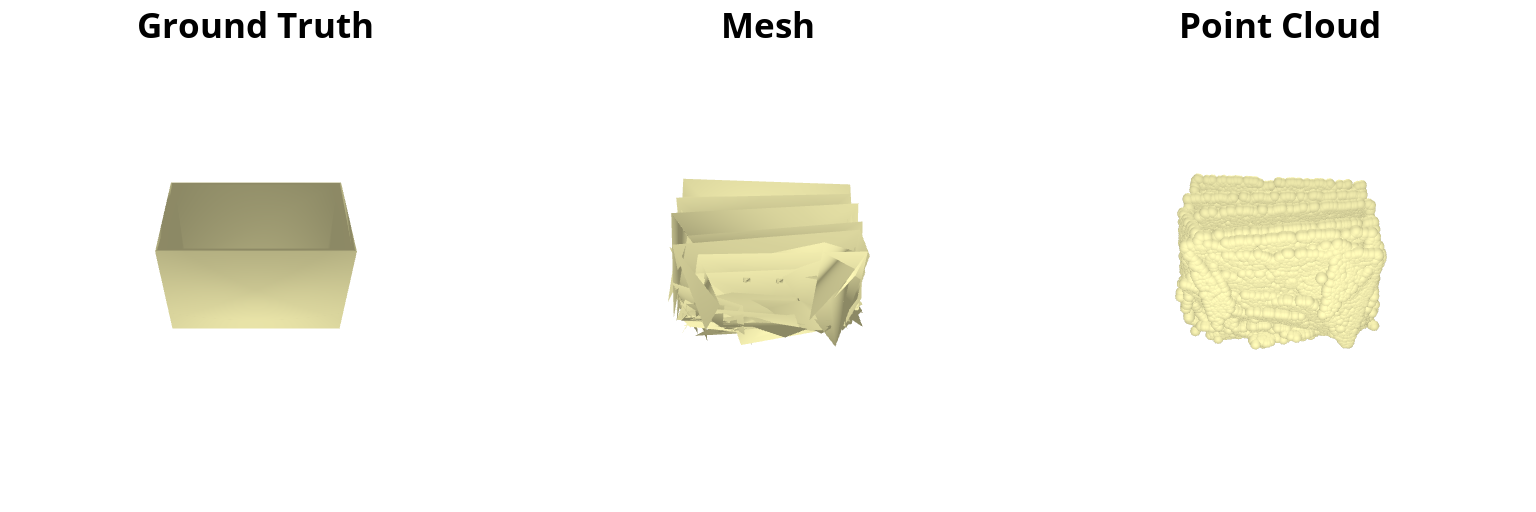

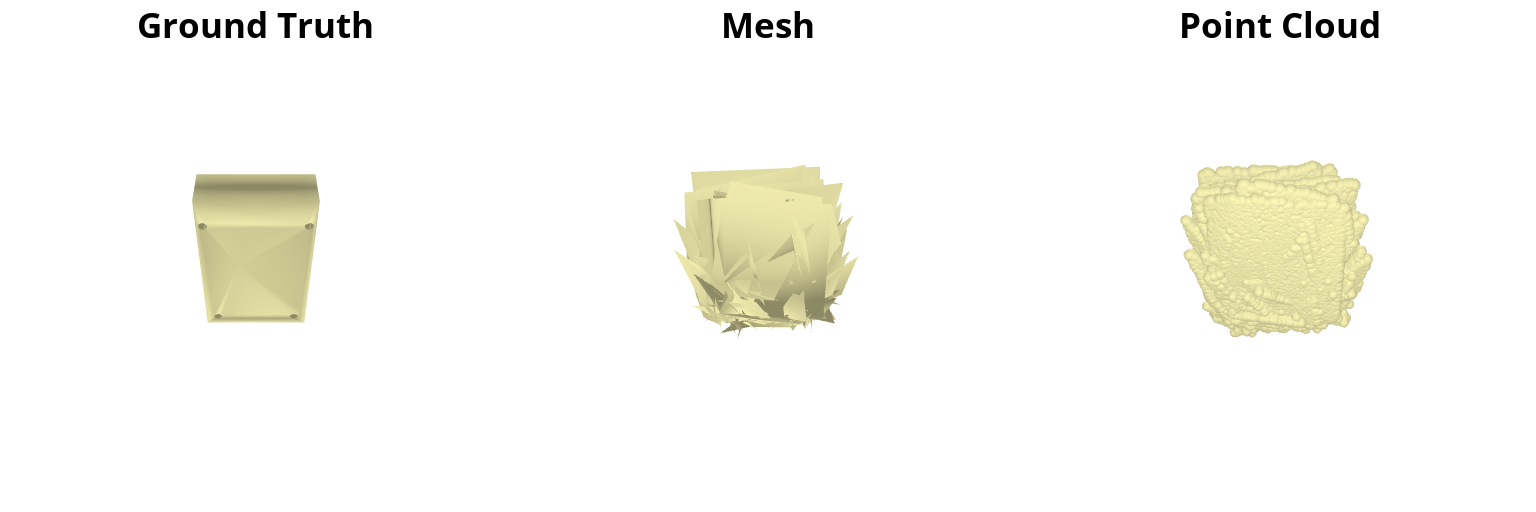

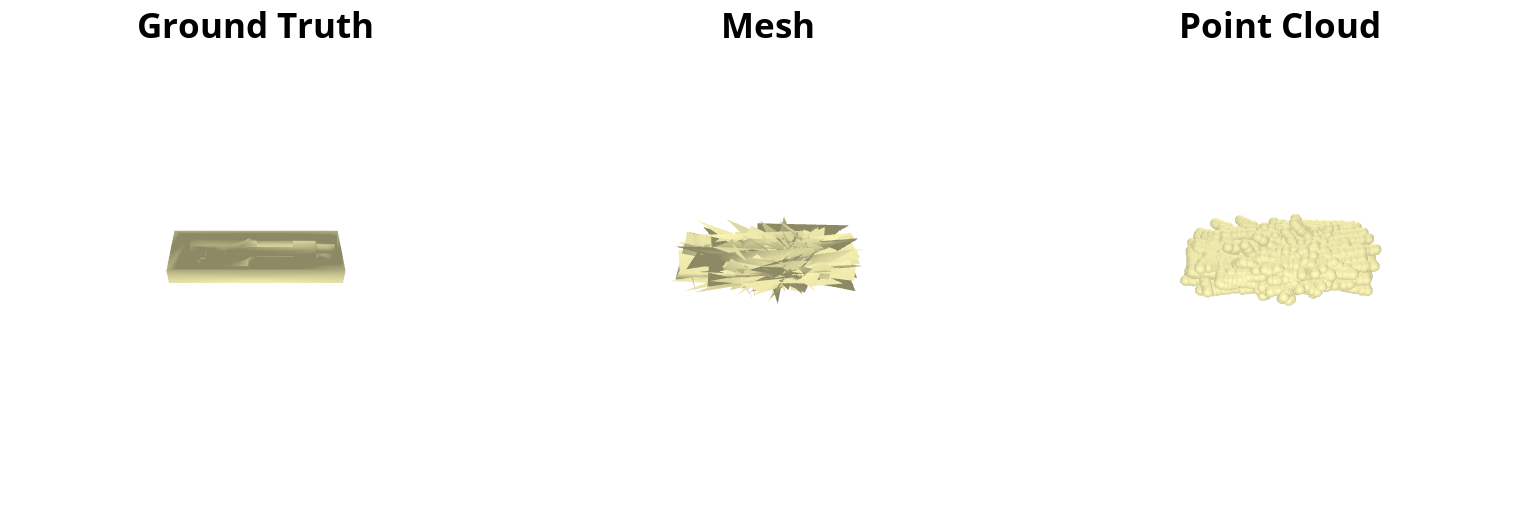

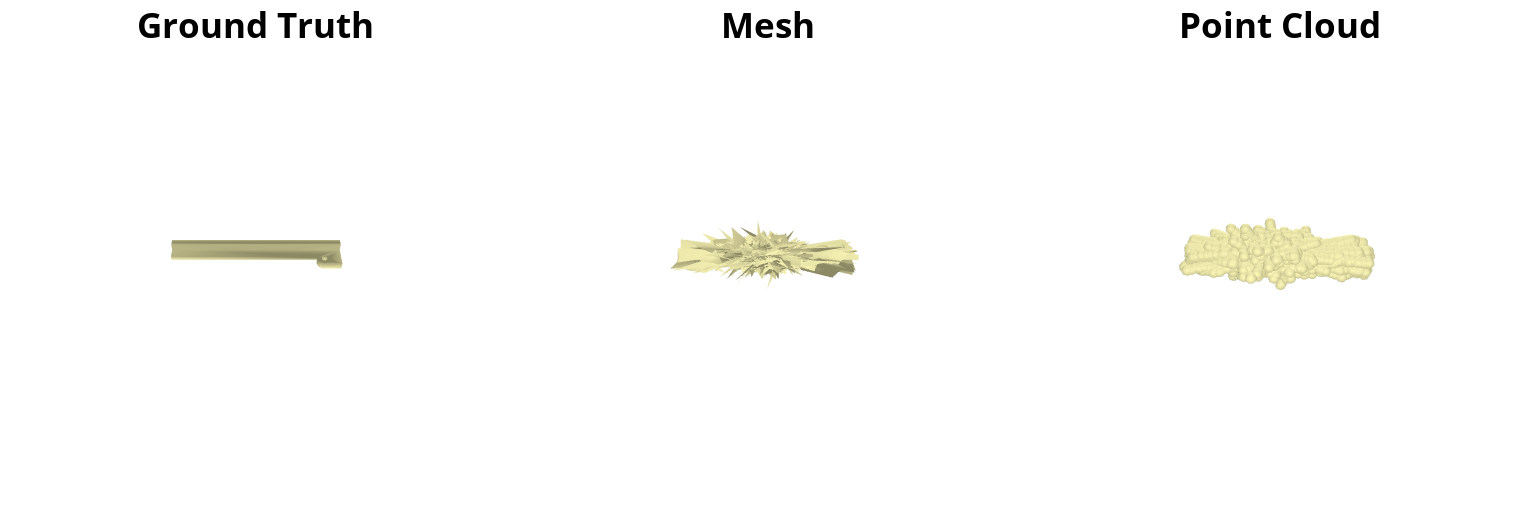

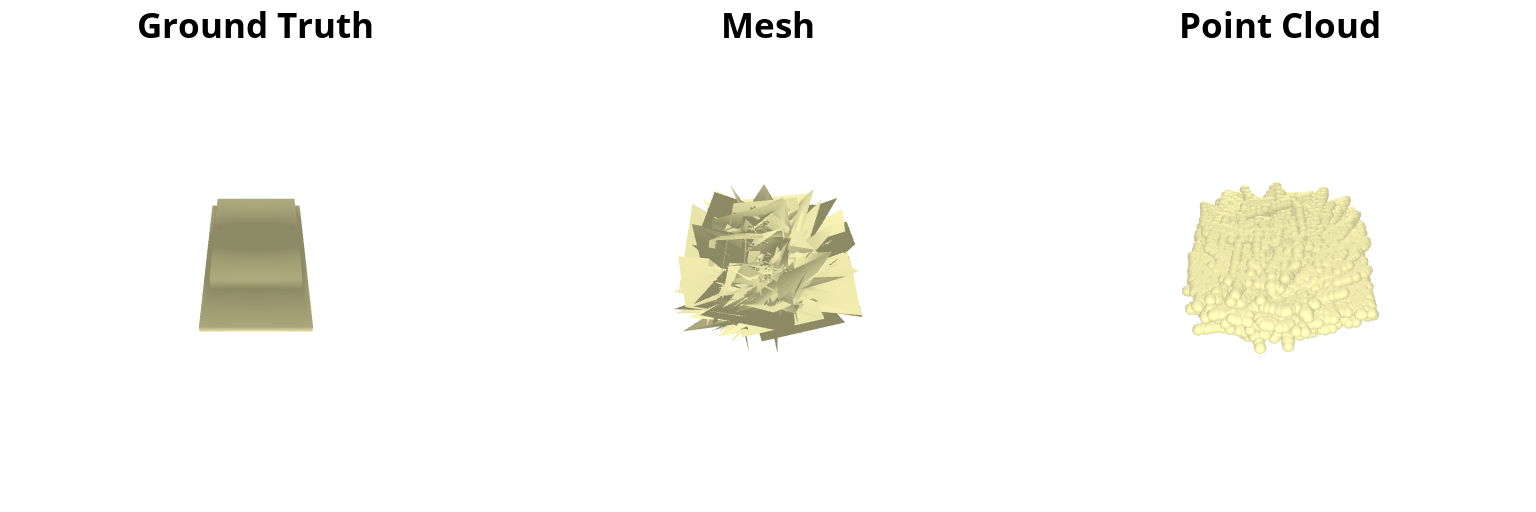

In [2]:
import os

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from glob import glob 

from pterotactyl import objects
FONT_LOCATION = os.path.dirname(objects.__file__) + '/OpenSans-Bold.ttf'


histogram = Image.open('results/greedy_example/histogram.png')
display(histogram)
print('\n\n')
actions = Image.open('results/greedy_example/sphere_projection.png')
print('   Projected Actions')
display(actions)



img_locations = glob('results/greedy_example/*/')
for location in img_locations[:5]:
    mesh = Image.open(location + "mesh.png")
    points = Image.open(location + "points.png")
    gt = Image.open(location + "ground_truth.png")
    
    
    combo = Image.new('RGB', (512*3, 512))
    x_offset = 0
    
    for im, st in [[gt, 'Ground Truth'], [mesh, 'Mesh'], [points, 'Point Cloud']]:
        
        draw = ImageDraw.Draw(im)
        font = ImageFont.truetype(FONT_LOCATION, 35)
        W,H = im.size
        w,h = font.getsize(st)
        draw.text(((W-w)/2, 0),st,(0, 0, 0), font = font)
        combo.paste(im, (x_offset, 0))
        x_offset += im.size[0]
        
    display(combo)